In [5]:
import pandas as pd
import numpy as np

In [70]:
ordf = pd.read_csv('ordf.csv',index_col=0)
ordf['rent_per_month'] = np.NaN
ordf['clas'] = 1.0

ardf = pd.read_csv('ardf.csv',index_col=0)
ardf['clas'] = 2.0

In [7]:
ordf

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_month
0,311480.0,131.63,2,30.082621,59.724677,28.29,47.0,NaN
1,254997.0,145.10,5,30.316138,59.911854,1.73,55.0,NaN
2,353742.0,73.50,7,30.301127,59.912368,3.13,55.0,NaN
3,190000.0,33.90,9,30.449978,59.956836,13.70,15.0,NaN
4,166667.0,89.40,5,30.325543,59.926372,0.50,26.0,NaN
...,...,...,...,...,...,...,...,...
1060,214003.0,90.00,15,30.255618,60.069750,10.24,10.0,NaN
1061,283334.0,36.00,2,30.276163,59.939027,5.69,37.0,NaN
1062,212556.0,181.60,16,30.273171,59.963539,6.17,37.0,NaN
1063,418519.0,81.00,20,30.308223,59.904247,2.64,55.0,NaN


In [4]:
ardf

,squares,rent_per_month,max_floor,latitude,longitude
0,22.9,29770.0,3.0,30.343905,59.965966
1,91.0,110000.0,16.0,30.200363,59.934109
2,70.0,110000.0,12.0,30.344677,59.873735
3,109.5,330000.0,18.0,30.262355,60.006575
4,77.5,116250.0,25.0,30.446151,59.902303
...,...,...,...,...,...
1326,350.0,800000.0,9.0,30.216829,59.937873
1327,347.0,800000.0,9.0,30.293231,59.954502
1328,162.0,291600.0,20.0,30.260523,59.928834
1329,112.0,150000.0,5.0,30.249204,59.937639


In [71]:
kndf = pd.merge(ordf,ardf,how='outer')

In [72]:
kndf.isna().sum()

price_per_square    1293
squares                0
max_floor             98
latitude               0
longitude              0
Nevskii prospekt    1293
parkings_1km        1293
rent_per_month       801
clas                   0
dtype: int64

In [73]:
kndf.max_floor.fillna(1.0,inplace=True)

C:\Users\Ростислав\AppData\Local\Temp\ipykernel_8756\2498197034.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kndf.max_floor.fillna(1.0,inplace=True)


In [43]:
kndf.columns

Index(['price_per_square', 'squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_month'],
      dtype='object')

In [74]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

In [75]:
imputer = KNNImputer()

# Fill missing values using KNN
filled_data = imputer.fit_transform(kndf)

In [53]:
filled_data

array([[2.062098e+05, 1.000000e+00, 3.000000e+00, ..., 6.220000e+00,
        5.600000e+01, 1.999900e+04],
       [2.062098e+05, 2.000000e+00, 1.000000e+00, ..., 6.220000e+00,
        5.600000e+01, 8.000000e+03],
       [1.729598e+05, 2.000000e+00, 6.000000e+00, ..., 6.558000e+00,
        6.000000e+01, 7.350000e+03],
       ...,
       [2.450000e+05, 2.782000e+03, 3.000000e+00, ..., 8.740000e+00,
        5.360000e+01, 2.503800e+06],
       [2.450000e+05, 3.000000e+03, 2.000000e+00, ..., 8.740000e+00,
        5.360000e+01, 5.000000e+06],
       [2.450000e+05, 5.400000e+03, 2.000000e+00, ..., 8.740000e+00,
        5.360000e+01, 3.629000e+06]])

In [76]:
fil_df = pd.DataFrame(data=filled_data)

In [77]:
fil_df.describe()

,0,1,2,3,4,5,6,7,8
count,2094.00000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2.094000e+03,2094.000000
mean,247669.14852,171.980248,8.579274,30.320892,59.927971,8.016858,46.265330,5.004011e+05,1.617479
std,65486.22650,277.962528,7.608315,0.092566,0.078772,4.189863,15.238366,7.211634e+06,0.486119
min,33750.00000,1.000000,1.000000,29.703684,59.684086,0.500000,1.000000,1.000000e+03,1.000000
25%,210860.00000,61.297500,3.000000,30.275992,59.878882,5.142500,36.450000,1.100000e+05,1.000000
50%,245000.00000,98.500000,5.000000,30.326253,59.932966,7.916000,48.000000,1.800000e+05,2.000000
75%,284939.90000,160.500000,13.000000,30.372298,59.984268,9.410000,53.600000,3.291890e+05,2.000000
max,450000.00000,5400.000000,40.000000,30.629326,60.205934,28.290000,120.000000,3.217688e+08,2.000000


In [58]:
kndf.describe()

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_month
count,801.000000,2094.000000,2094.000000,2094.000000,2094.000000,801.000000,801.000000,1.293000e+03
mean,251076.903870,171.980248,8.579274,30.320892,59.927971,7.952434,44.662921,6.777774e+05
std,90575.594611,277.962528,7.608315,0.092566,0.078772,5.759339,21.305427,9.173002e+06
min,33750.000000,1.000000,1.000000,29.703684,59.684086,0.500000,1.000000,1.000000e+03
25%,182836.000000,61.297500,3.000000,30.275992,59.878882,3.380000,27.000000,1.000000e+05
50%,250000.000000,98.500000,5.000000,30.326253,59.932966,6.930000,42.000000,1.920000e+05
75%,319615.000000,160.500000,13.000000,30.372298,59.984268,11.010000,59.000000,4.200000e+05
max,450000.000000,5400.000000,40.000000,30.629326,60.205934,28.290000,120.000000,3.217688e+08


In [63]:
ardf.describe()

,squares,rent_per_month,max_floor,latitude,longitude
count,1293.000000,1.293000e+03,1195.000000,1293.000000,1293.000000
mean,219.921903,6.777774e+05,8.433473,30.321476,59.925001
std,343.216737,9.173002e+06,7.251839,0.098767,0.081402
min,1.000000,1.000000e+03,1.000000,29.703684,59.684086
25%,62.300000,1.000000e+05,3.000000,30.274258,59.866734
50%,110.000000,1.920000e+05,5.000000,30.326441,59.932779
75%,212.100000,4.200000e+05,12.000000,30.375265,59.980704
max,5400.000000,3.217688e+08,40.000000,30.629326,60.205934


In [78]:
fil_df = fil_df[fil_df[7]<=500000.0]

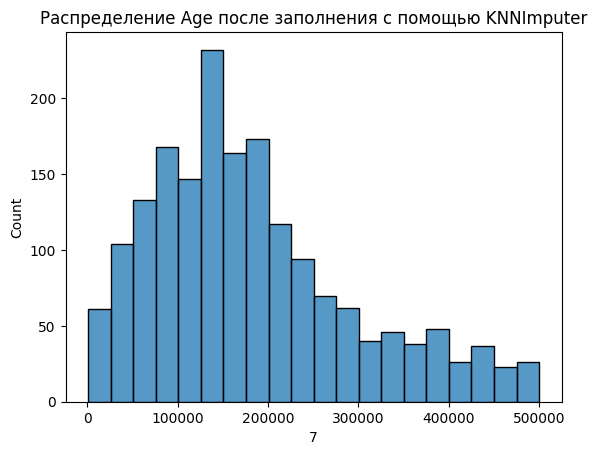

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# посмотрим на распределение возраста после заполнения пропусков
sns.histplot(fil_df[7], bins = 20)
plt.title('Распределение Age после заполнения с помощью KNNImputer');

In [80]:
fil_df.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,-0.064380,0.257255,-0.056625,0.027654,-0.083970,-0.030922,-0.023025,-0.039161
1,-0.064380,1.000000,-0.013762,-0.004786,0.013060,0.059834,0.104084,0.616999,0.121647
2,0.257255,-0.013762,1.000000,-0.011819,0.093510,0.277388,-0.086402,0.047510,-0.087121
3,-0.056625,-0.004786,-0.011819,1.000000,-0.068184,-0.172321,-0.015916,-0.033287,0.006695
4,0.027654,0.013060,0.093510,-0.068184,1.000000,-0.110931,0.065386,0.037548,-0.055131
5,-0.083970,0.059834,0.277388,-0.172321,-0.110931,1.000000,-0.314216,0.020844,-0.002387
6,-0.030922,0.104084,-0.086402,-0.015916,0.065386,-0.314216,1.000000,0.067200,0.041812
7,-0.023025,0.616999,0.047510,-0.033287,0.037548,0.020844,0.067200,1.000000,-0.040329
8,-0.039161,0.121647,-0.087121,0.006695,-0.055131,-0.002387,0.041812,-0.040329,1.000000


In [81]:
fil_df = fil_df[fil_df[8] != 2.0]

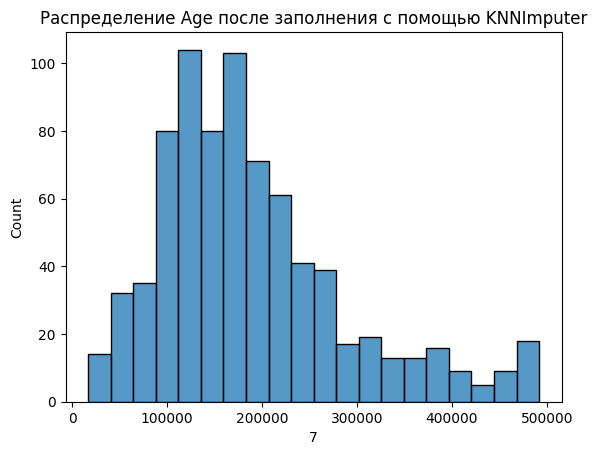

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# посмотрим на распределение возраста после заполнения пропусков
sns.histplot(fil_df[7], bins = 20)
plt.title('Распределение Age после заполнения с помощью KNNImputer');

In [83]:
fil_df.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,-0.082124,0.233634,-0.103143,0.032236,-0.104169,0.019418,-0.044293,NaN
1,-0.082124,1.000000,0.000963,-0.028868,0.032740,0.012390,0.065908,0.831973,NaN
2,0.233634,0.000963,1.000000,-0.037721,0.148209,0.238121,-0.044779,-0.002263,NaN
3,-0.103143,-0.028868,-0.037721,1.000000,0.072065,-0.306749,-0.065492,-0.036948,NaN
4,0.032236,0.032740,0.148209,0.072065,1.000000,-0.264722,0.112165,0.000129,NaN
5,-0.104169,0.012390,0.238121,-0.306749,-0.264722,1.000000,-0.319025,-0.019719,NaN
6,0.019418,0.065908,-0.044779,-0.065492,0.112165,-0.319025,1.000000,0.065012,NaN
7,-0.044293,0.831973,-0.002263,-0.036948,0.000129,-0.019719,0.065012,1.000000,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
from scipy.stats import pearsonr

for i in fil_df.columns:
    print(f"{i}:{pearsonr(fil_df[0], fil_df[i])}")

0:PearsonRResult(statistic=0.9999999999999993, pvalue=0.0)
1:PearsonRResult(statistic=-0.08212383522865152, pvalue=0.021887441708838197)
2:PearsonRResult(statistic=0.23363405499768555, pvalue=4.057343673512202e-11)
3:PearsonRResult(statistic=-0.1031426431190621, pvalue=0.00395364648442798)
4:PearsonRResult(statistic=0.032236494828160614, pvalue=0.3689042753147383)
5:PearsonRResult(statistic=-0.10416946428339807, pvalue=0.0036064010950599785)
6:PearsonRResult(statistic=0.019417709949681533, pvalue=0.5884110074495295)
7:PearsonRResult(statistic=-0.04429338770510353, pvalue=0.21687715315797118)
8:PearsonRResult(statistic=nan, pvalue=nan)


C:\Users\Ростислав\AppData\Local\Temp\ipykernel_8756\3317281031.py:4: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  print(f"{i}:{pearsonr(fil_df[0], fil_df[i])}")
